In [1]:
from google.colab import drive
import os
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data = pd.read_csv('/content/drive/My Drive/EPL/data/data.csv')

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093602 entries, 0 to 2093601
Data columns (total 29 columns):
 #   Column            Dtype  
---  ------            -----  
 0   timestamp         float64
 1   half              int64  
 2   ht_elo            float64
 3   at_elo            float64
 4   ht_goal           int64  
 5   at_goal           int64  
 6   pass              int64  
 7   short_pass        int64  
 8   long_pass         int64  
 9   final_3rd_pass    int64  
 10  key_pass          int64  
 11  cross             int64  
 12  corner            int64  
 13  big_chance        int64  
 14  shot              int64  
 15  shot_6_yard_box   int64  
 16  shot_penalty_box  int64  
 17  shot_open_play    int64  
 18  shot_fast_break   int64  
 19  dispossessed      int64  
 20  turnover          int64  
 21  duel              int64  
 22  tackle            int64  
 23  interception      int64  
 24  clearance         int64  
 25  offside           int64  
 26  yellow        

In [ ]:
data.isnull().sum()

timestamp           0
half                0
ht_elo              0
at_elo              0
ht_goal             0
at_goal             0
pass                0
short_pass          0
long_pass           0
final_3rd_pass      0
key_pass            0
cross               0
corner              0
big_chance          0
shot                0
shot_6_yard_box     0
shot_penalty_box    0
shot_open_play      0
shot_fast_break     0
dispossessed        0
turnover            0
duel                0
tackle              0
interception        0
clearance           0
offside             0
yellow              0
red                 0
result              0
dtype: int64

In [ ]:
data.sample(10)

,timestamp,half,ht_elo,at_elo,ht_goal,at_goal,pass,short_pass,long_pass,final_3rd_pass,...,dispossessed,turnover,duel,tackle,interception,clearance,offside,yellow,red,result
417395,5430.0,2,1695.876953,1655.887207,1,3,198,184,3,69,...,-1,6,8,2,-7,-14,1,2,0,L
949286,1563.0,1,1864.440918,1676.972778,1,1,123,116,14,5,...,0,0,-6,0,1,0,1,0,0,W
1094618,1626.0,1,1660.532349,2024.150024,0,0,-66,-58,-7,-40,...,-1,2,1,0,1,1,-1,0,0,L
131417,4047.0,2,1649.656372,1691.973755,1,0,-117,-123,13,-27,...,2,2,7,2,-1,14,-2,1,0,W
207137,5933.0,2,1562.522949,1742.639160,2,0,-123,-121,-10,-78,...,12,6,0,-8,0,12,0,1,0,W
1015437,2647.0,1,1565.128662,1795.333496,0,2,-102,-100,-3,-29,...,2,-2,4,-4,4,3,1,-1,0,L
512699,3914.0,2,1685.873291,1696.596069,1,2,113,113,6,65,...,-10,1,-6,12,-4,-9,-1,-3,0,L
1382102,486.0,1,1955.779175,1694.470703,0,0,32,36,-4,1,...,2,-3,2,0,-2,-1,1,0,0,D
149681,4410.0,2,1671.052002,1647.393921,0,1,151,151,-7,24,...,0,-5,-1,-3,-1,-13,0,-2,0,D
1614612,721.0,1,1679.707031,1861.046143,0,0,3,2,-1,-1,...,1,0,-1,0,0,4,-1,0,0,W


In [ ]:
data.describe()

,timestamp,half,ht_elo,at_elo,ht_goal,at_goal,pass,short_pass,long_pass,final_3rd_pass,...,shot_fast_break,dispossessed,turnover,duel,tackle,interception,clearance,offside,yellow,red
count,2.093602e+06,2.093602e+06,2.093602e+06,2.093602e+06,2.093602e+06,2.093602e+06,2.093602e+06,2.093602e+06,2.093602e+06,2.093602e+06,...,2.093602e+06,2.093602e+06,2.093602e+06,2.093602e+06,2.093602e+06,2.093602e+06,2.093602e+06,2.093602e+06,2.093602e+06,2.093602e+06
mean,2.749279e+03,1.493787e+00,1.763048e+03,1.762197e+03,7.031895e-01,5.872100e-01,1.107422e+01,1.063687e+01,-6.007990e-01,9.950684e+00,...,1.695308e-02,6.209394e-03,9.183837e-02,2.054149e-01,7.441959e-02,-1.004293e-01,-1.660304e+00,4.633784e-02,-5.575176e-02,-3.353073e-04
std,2.118470e+03,5.000360e-01,1.194959e+02,1.192233e+02,9.931690e-01,8.867482e-01,1.525648e+02,1.494695e+02,9.213721e+00,6.164998e+01,...,6.927772e-01,3.381190e+00,3.579949e+00,4.334006e+00,3.187291e+00,3.720870e+00,8.765112e+00,1.406698e+00,9.782175e-01,2.048790e-01
min,0.000000e+00,1.000000e+00,1.499452e+03,1.504429e+03,0.000000e+00,0.000000e+00,-7.390000e+02,-7.250000e+02,-4.900000e+01,-3.430000e+02,...,-5.000000e+00,-2.100000e+01,-2.000000e+01,-2.500000e+01,-1.600000e+01,-2.300000e+01,-7.200000e+01,-8.000000e+00,-5.000000e+00,-2.000000e+00
25%,1.342000e+03,1.000000e+00,1.678754e+03,1.675784e+03,0.000000e+00,0.000000e+00,-6.500000e+01,-6.400000e+01,-5.000000e+00,-1.700000e+01,...,0.000000e+00,-2.000000e+00,-2.000000e+00,-2.000000e+00,-2.000000e+00,-2.000000e+00,-6.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00
50%,2.742000e+03,1.000000e+00,1.737678e+03,1.735498e+03,0.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,0.000000e+00,5.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.119000e+03,2.000000e+00,1.843896e+03,1.843553e+03,1.000000e+00,1.000000e+00,8.800000e+01,8.500000e+01,4.000000e+00,3.600000e+01,...,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,1.966068e+06,1.400000e+01,2.088262e+03,2.090136e+03,9.000000e+00,9.000000e+00,6.760000e+02,6.740000e+02,4.400000e+01,4.080000e+02,...,5.000000e+00,1.600000e+01,2.000000e+01,2.800000e+01,1.700000e+01,2.000000e+01,4.700000e+01,8.000000e+00,6.000000e+00,2.000000e+00


In [ ]:
print('W', round(data['result'].value_counts()['W']/len(data) * 100,2), '% of the dataset')
print('D', round(data['result'].value_counts()['D']/len(data) * 100,2), '% of the dataset')
print('L', round(data['result'].value_counts()['L']/len(data) * 100,2), '% of the dataset')

W 44.46 % of the dataset
D 21.86 % of the dataset
L 33.69 % of the dataset


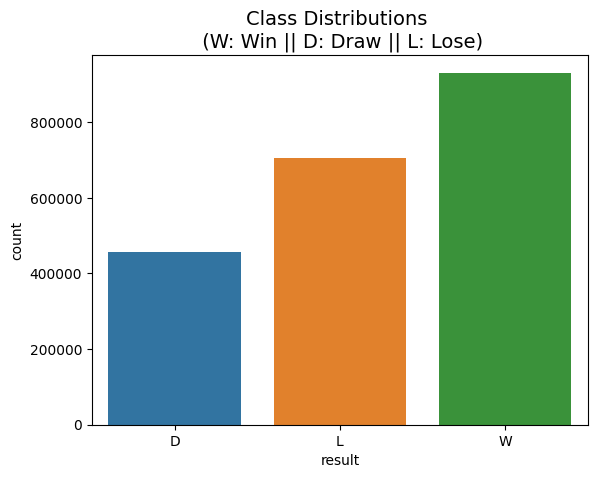

In [ ]:
sns.countplot(x='result', data=data)
plt.title('Class Distributions \n (W: Win || D: Draw || L: Lose)', fontsize=14)
plt.show()

In [4]:
data['result'] = data['result'].astype('category')

In [5]:
x = data.drop('result', axis = 1)
y = data['result']
x = x.values
y = y.values

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

start_time = time.time()
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1, random_state=0, stratify = y)

clf = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=1000)
name = clf.__class__.__name__

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', clf)
])

pipeline.fit(xtrain, ytrain)

probabilities = pipeline.predict_proba(xtest)

roc_auc = roc_auc_score(ytest, probabilities, multi_class='ovr')
print(f'Done: {name}, time: {time.time()-start_time}, ROC AUC score: {roc_auc}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Done: LogisticRegression, time: 3080.4754071235657, ROC AUC score: 0.8292556063191437


In [6]:
ex_data = pd.read_csv('/content/drive/My Drive/EPL/test/data/data.csv')

In [8]:
probs = pipeline.predict_proba(ex_data.drop('result', axis = 1))
probs

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[0.23545256, 0.44251808, 0.32202936],
       [0.23551416, 0.44225776, 0.32222808],
       [0.23505503, 0.44417042, 0.32077455],
       ...,
       [0.09651587, 0.00485508, 0.89862905],
       [0.0959945 , 0.00479728, 0.89920823],
       [0.09869926, 0.00474573, 0.89655501]])

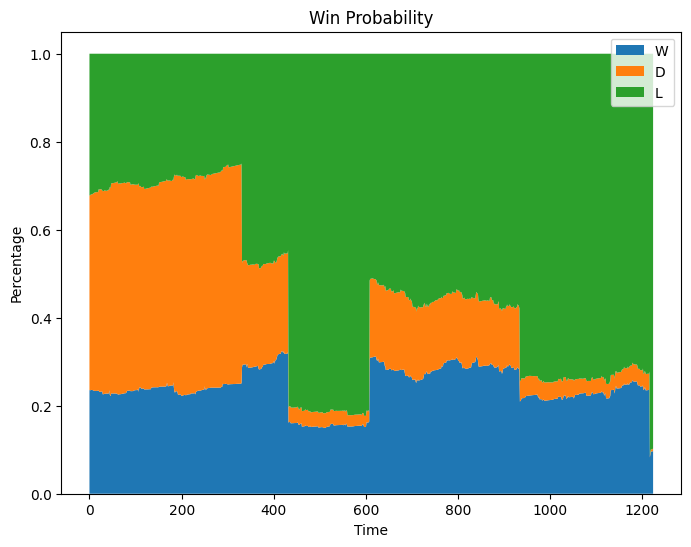

In [12]:
plt.figure(figsize=(8, 6))
plt.stackplot(range(len(probs)), probs.T, labels=['W', 'D', 'L'])
plt.title('Win Probability')
plt.xlabel('Time')
plt.ylabel('Percentage')
plt.legend()
plt.show()